<a href="https://colab.research.google.com/github/glennamaria/Projects/blob/main/Fraud%20detection%20in%20e-commerce%20transactions%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Project.csv"
df= pd.read_csv(path)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [5]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


isFraud
0    1047433
1       1142
Name: count, dtype: int64


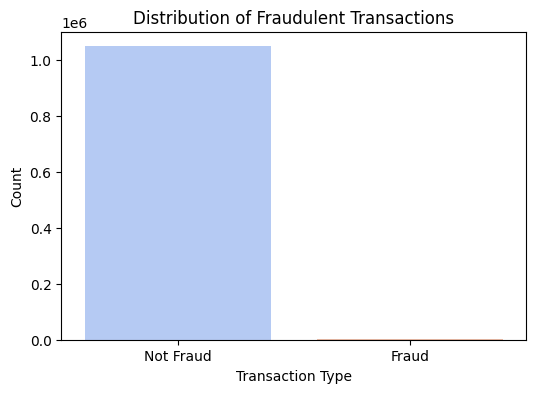

In [8]:
# Count fraud vs. non-fraud transactions
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent Transactions")
plt.show()

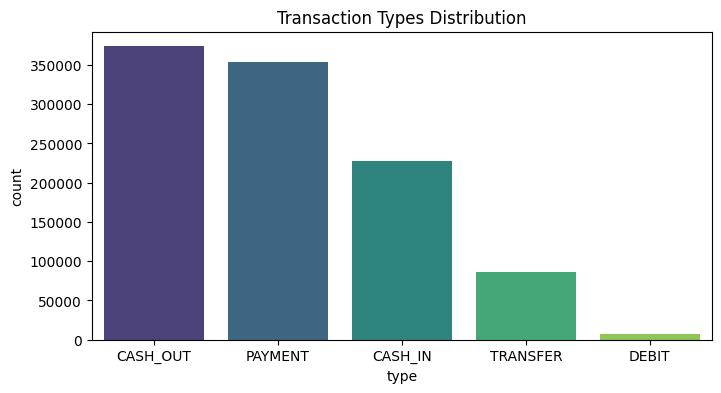

In [9]:
# Count transaction types
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="type", palette="viridis", order=df["type"].value_counts().index)
plt.title("Transaction Types Distribution")
plt.show()

In [10]:
# Fraud percentage per transaction type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)

type
TRANSFER    0.006501
CASH_OUT    0.001547
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [11]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [12]:
# Convert 'type' to numerical values using Label Encoding
encoder = LabelEncoder()
df["type"] = encoder.fit_transform(df["type"])

In [13]:
# Downsample majority class (non-fraud transactions) to match the minority class
fraud = df[df["isFraud"] == 1]
non_fraud = df[df["isFraud"] == 0].sample(n=len(fraud), random_state=42)

# Combine fraud and non-fraud samples
balanced_df = pd.concat([fraud, non_fraud])

# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
X = balanced_df.drop("isFraud", axis=1)
y = balanced_df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9671772428884027
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       221
           1       0.97      0.97      0.97       236

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



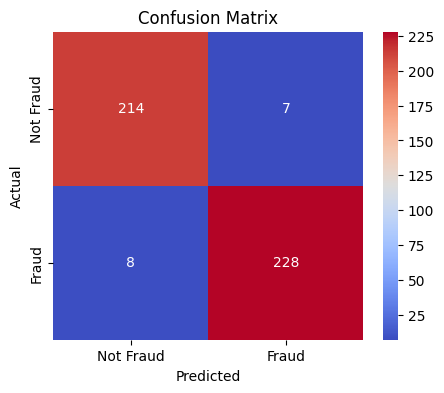

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of being fraud
threshold = 0.3
y_pred_new = (y_probs > threshold).astype(int)

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       221
           1       0.95      0.97      0.96       236

    accuracy                           0.96       457
   macro avg       0.96      0.96      0.96       457
weighted avg       0.96      0.96      0.96       457



In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       221
           1       0.98      0.98      0.98       236

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



In [21]:
train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9781


In [22]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       221
           1       0.98      0.98      0.98       236

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



In [23]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc > test_acc + 0.1:  # Threshold for overfitting
    print("Warning: Model is overfitting!")


Training Accuracy: 1.0000
Test Accuracy: 0.9672


In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.1)  # L2 Regularization (Ridge)
model.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [30]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       221
           1       0.93      0.96      0.94       236

    accuracy                           0.94       457
   macro avg       0.94      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



In [31]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc > test_acc + 0.1:  # Threshold for overfitting
    print("Warning: Model is overfitting!")

Training Accuracy: 0.9579
Test Accuracy: 0.9519
